**FFT**

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20, 10)

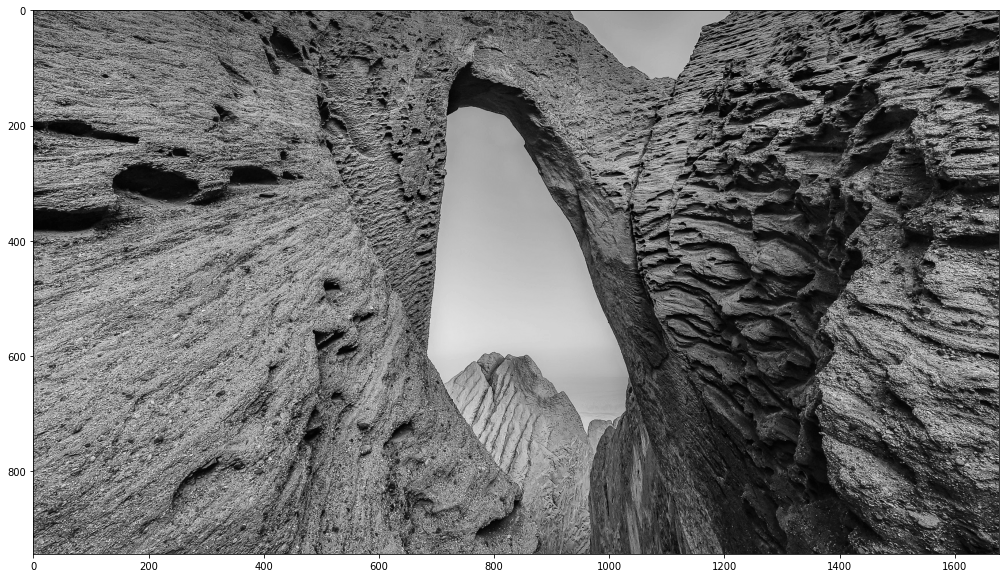

In [64]:
image1_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/HighArchChina.jpg')
image1_original = cv2.cvtColor(image1_original, cv2.COLOR_BGR2GRAY)
plt.imshow(image1_original, cmap='gray')
last_processed_image = image1_original

# 2D DFT 

In Forward transformation, interested in magnitude<br>
In Inverse transformation, interested in Real Part!

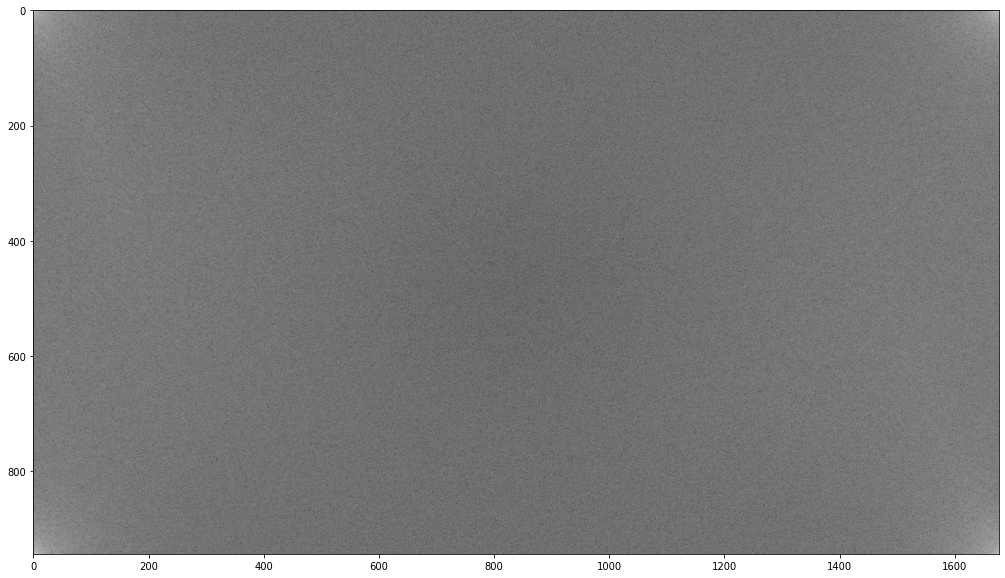

In [63]:
image_fft = np.fft.fft2(last_processed_image)
image_fft_amplitude = np.log(np.abs(image_fft))
image_fft_amplitude_normalized = image_fft_amplitude - np.min(image_fft_amplitude)
image_fft_amplitude_normalized /= np.max(image_fft_amplitude_normalized)
plt.imshow(image_fft_amplitude_normalized, cmap='gray')


for color image, you must apply apply fft2 function seperately for each channel

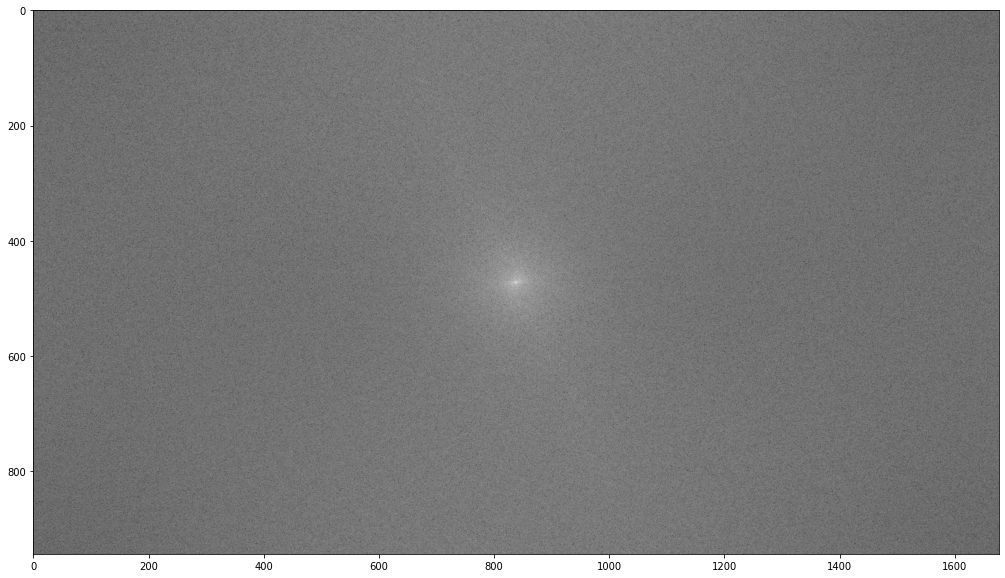

In [ ]:
shifted_image_fft = np.fft.fftshift(image_fft)
shifted_image_fft_amplitude = np.log(np.abs(shifted_image_fft))
shifted_image_fft_amplitude_normalized = shifted_image_fft_amplitude - np.min(shifted_image_fft_amplitude)
shifted_image_fft_amplitude_normalized /= np.max(shifted_image_fft_amplitude_normalized)
plt.imshow(shifted_image_fft_amplitude_normalized, cmap='gray')


## FFT samples

In [ ]:
def frequency_domain_plot(image):
    plt.imshow(image, cmap='gray')
    plt.figure()
    image_fft = np.fft.fft2(image)
    shifted_image_fft = np.fft.fftshift(image_fft)
    shifted_image_fft_amplitude = np.log(np.abs(shifted_image_fft)+0.1)
    shifted_image_fft_amplitude_normalized = shifted_image_fft_amplitude - np.min(shifted_image_fft_amplitude)
    shifted_image_fft_amplitude_normalized /= np.max(shifted_image_fft_amplitude_normalized)
    plt.imshow(shifted_image_fft_amplitude_normalized, cmap='gray')

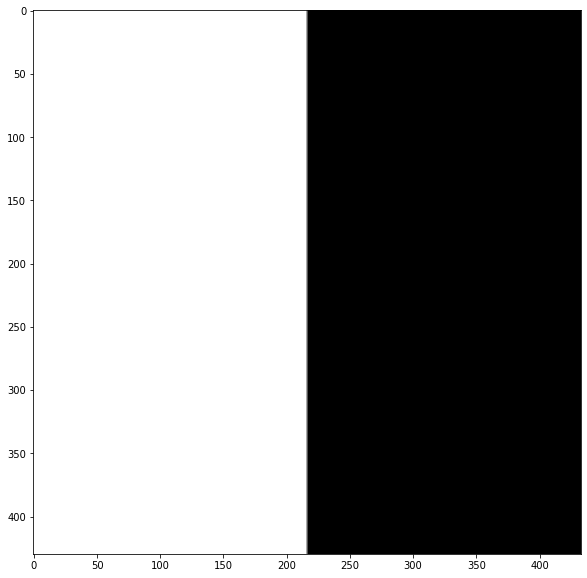

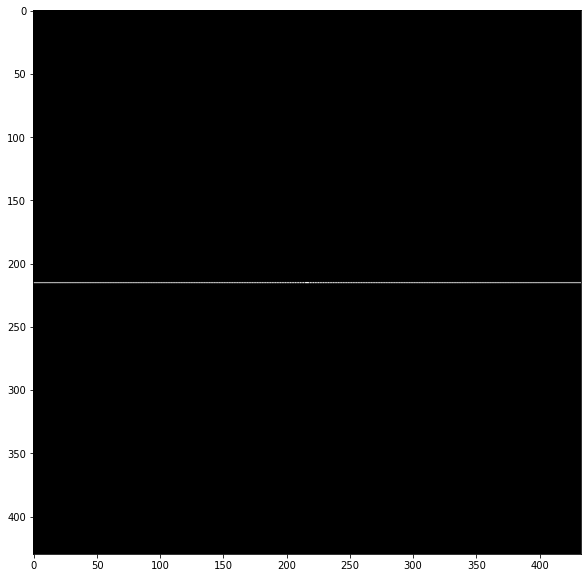

In [59]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/horizontal.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
frequency_domain_plot(image)
last_processed_image = image

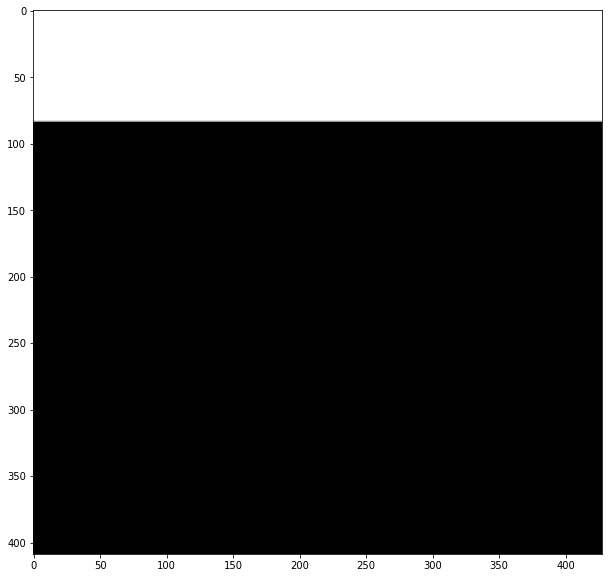

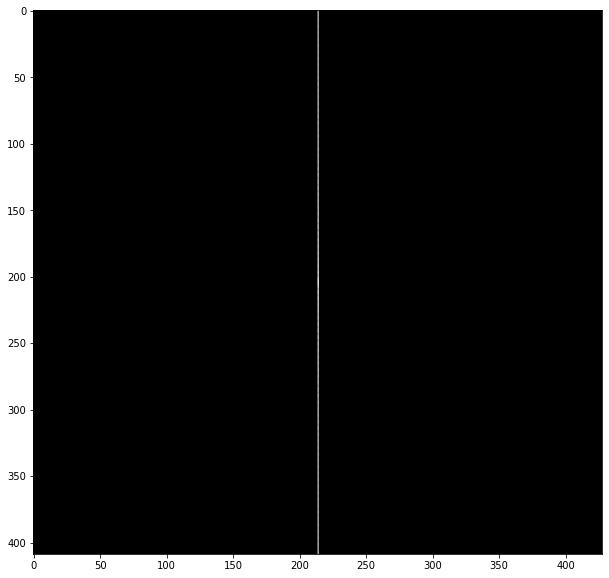

In [60]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/vertical.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
frequency_domain_plot(image)
last_processed_image = image

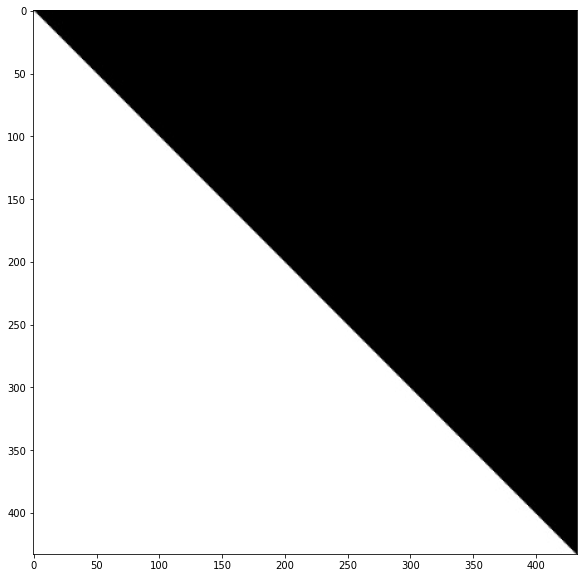

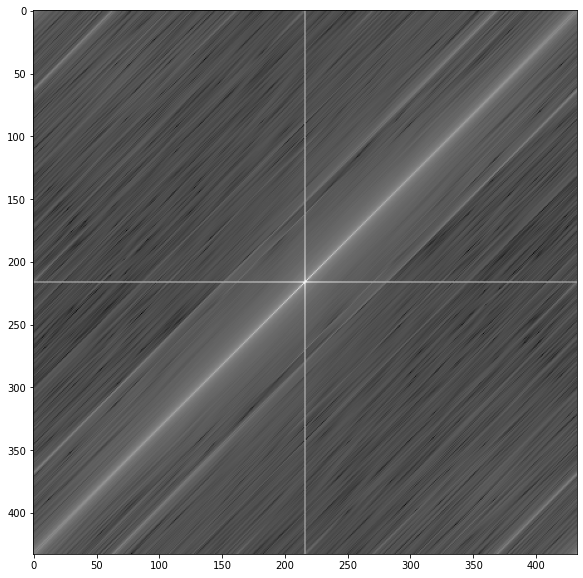

In [61]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/diagonal.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
frequency_domain_plot(image)
last_processed_image = image

# Filtering in the frequency domain

## spatial and corresponding fft
box - gaussian

ideal low pass filter

<ipython-input-67-be9fd328c231>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filter_LP = np.zeros(last_processed_image.shape,np.float)


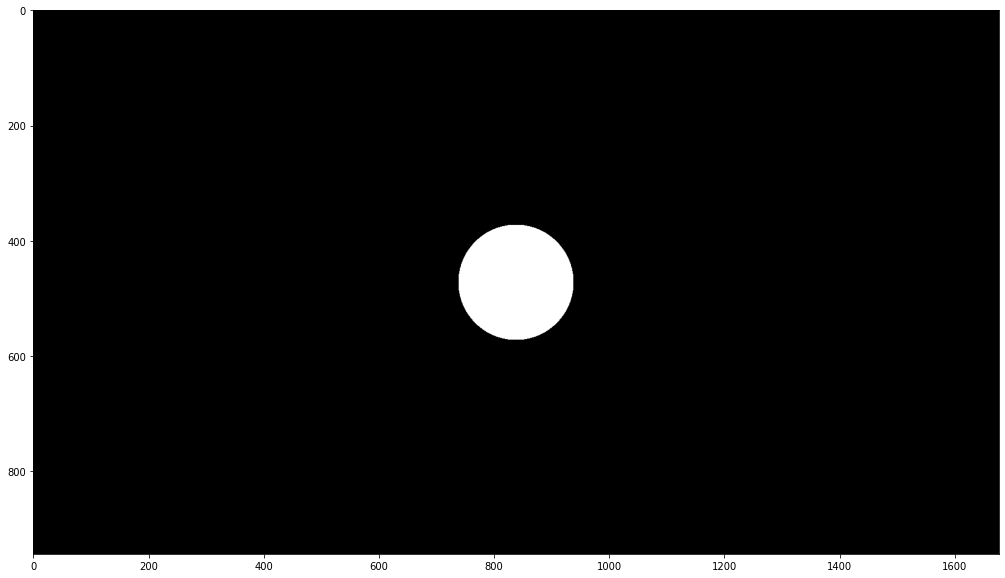

In [67]:
r = 100 #lowpass radius
r = r**2
filter_LP = np.zeros(last_processed_image.shape,np.float)
moux = int(last_processed_image.shape[0] / 2)
mouy = int(last_processed_image.shape[1] / 2)
for i in range(last_processed_image.shape[0]):
  for j in range(last_processed_image.shape[1]):
    if (i - moux)**2 + (j - mouy)**2 < r:
        filter_LP[i,j] = 1
    else :
        filter_LP[i,j] = 0
plt.imshow(filter_LP,cmap='gray')        

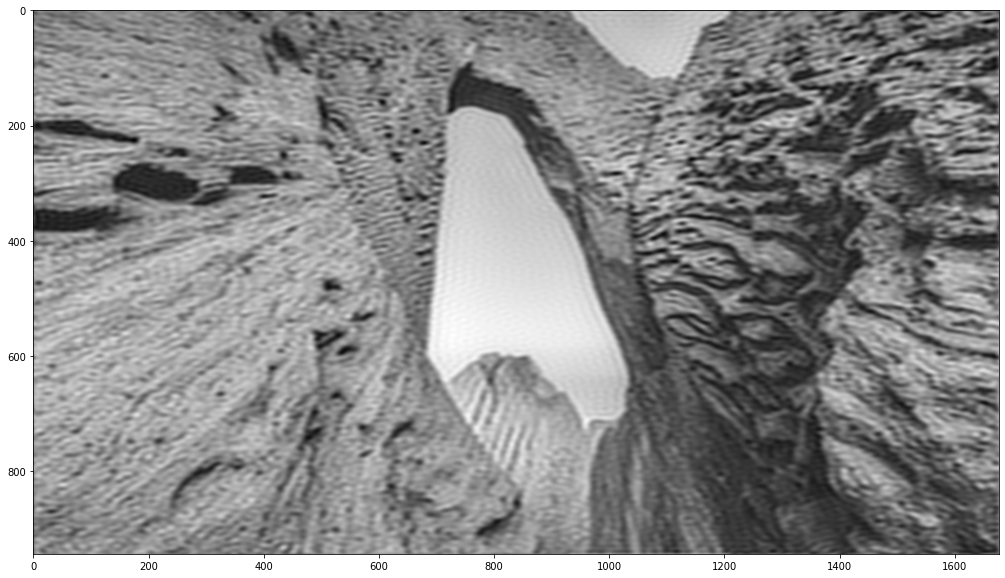

In [68]:
filtered_image_fft = shifted_image_fft * filter_LP
fil_im_ishifted = np.fft.ifftshift(filtered_image_fft)
fil_im = np.fft.ifft2(fil_im_ishifted)
fil_im = np.real(fil_im)
plt.imshow(fil_im,cmap='gray')

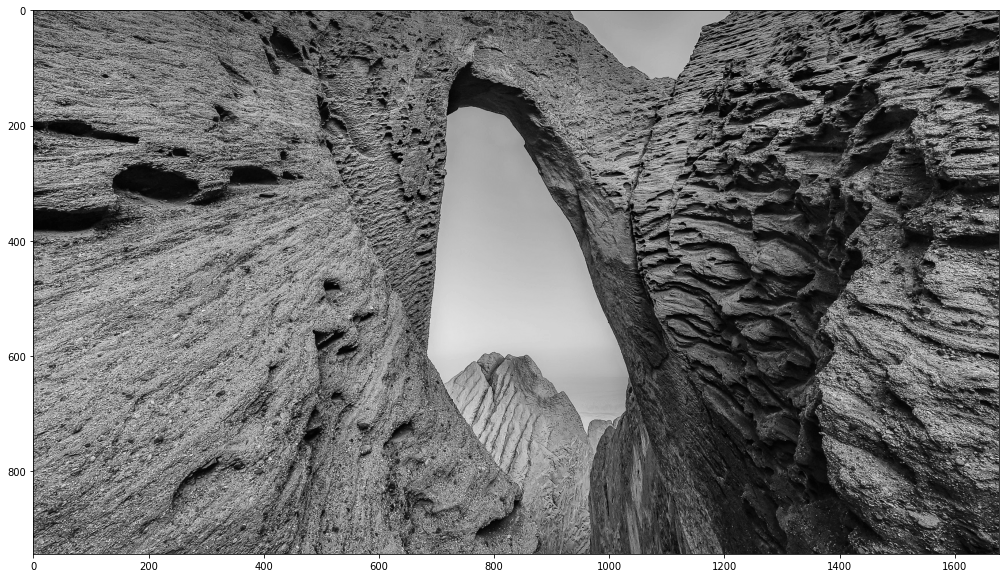

In [ ]:
plt.imshow(last_processed_image, cmap='gray')